### Importing Libraries

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### Loading the dataset

In [1]:

path=os.listdir("Downloads/tumor/Training/")
classes={'no_tumor':0,'pituitary_tumor':1,'meningioma_tumor':1,'glioma_tumor':1}

In [2]:

X=[]
y=[]
for cls in classes:
    pth="Downloads/tumor/Training/"+cls
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j,0)
        img=cv2.resize(img,(200,200))# 0 is for lad the image in greyscale
        X.append(img)
        y.append(classes[cls])

In [3]:
X

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6],
        ...,
        [6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 2],
        [0, 0, 0, ..., 0, 0, 1]], dtype=uint8),
 array([[10, 10, 10, ..., 10, 10,  9],
        [10, 10, 10, ..., 10, 10,  9],
        [10, 10, 1

In [8]:
X=np.array(X)
y=np.array(y)

In [9]:
X_update=X.reshape(len(X),-1)

In [10]:
X_update.shape

(2870, 40000)

In [11]:
np.unique(y)

array([0, 1])

### MRI IMAGE

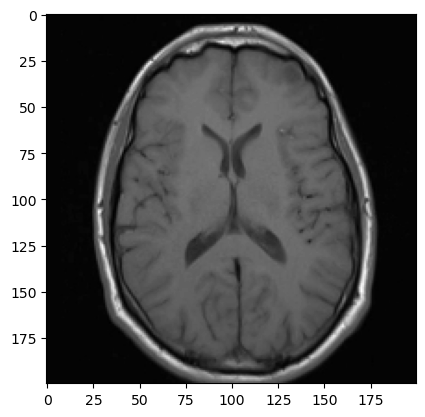

In [12]:
plt.imshow(X[2],cmap='gray')

### value counts

In [13]:
pd.Series(y).value_counts(normalize=True)

1    0.862369
0    0.137631
dtype: float64

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(X_update,y,random_state=10,test_size=0.20)

In [15]:
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

In [16]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0


In [17]:
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

1.0 0.0
1.0 0.0


### Model Building

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
lg=LogisticRegression()# c isa hyperparameter which is inversly proprtional to regulization which is to used to minimize the loss function

In [21]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [45]:
sv=SVC(kernel='linear',C=1)

In [23]:
sv.fit(xtrain,ytrain)

SVC(C=10, gamma=0.6, kernel='linear')

In [24]:
print('accuray score when using Logistic Regression',lg.score(xtrain,ytrain))

accuray score when using Logistic Regression 1.0


In [25]:
print('accuray score when using SVM ',sv.score(xtrain,ytrain))

accuray score when using SVM  1.0


In [26]:
print('accuray score when using Logistic Regression',lg.score(xtest,ytest))
print('accuray score when using SVM ',sv.score(xtest,ytest))

accuray score when using Logistic Regression 0.9320557491289199
accuray score when using SVM  0.9425087108013938


In [35]:
import cv2
X1=[]
y1=[]
for cls in classes:
    pth="Downloads/tumor/Testing/"+cls
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j,0)
        img=cv2.resize(img,(200,200))# 0 is for lad the image in greyscale
        X1.append(img)
        y1.append(classes[cls])

In [36]:
X1=np.array(X1)
y1=np.array(y1)

In [37]:
X_update=X1.reshape(len(X1),-1)

In [38]:
print(X_update.max())

255


In [39]:
X_update=X_update/255


In [40]:
lg.score(X_update,y1)

0.8401015228426396

In [41]:
X_update.max()

1.0

In [42]:
sv.score(X_update,y1)

0.8629441624365483